* Name: Yogesh Dhaliya
* Phone no: 6350214104
* E-mail: yogeshdhaliyaa@gmail.com
* Linkedin: https://www.linkedin.com/in/yogeshdhaliyaa/
* Github: https://github.com/yogeshdhaliya
* Portfolio: https://yogeshdhaliya.github.io/yogeshportfolio.github.io/

# Call Center Performance Optimization 

Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Task 1: Data Exploration

1. Load the dataset into your preferred data analysis tool (e.g., Python, R, Excel)

In [2]:
df = pd.read_csv("/Users/yogeshdhaliya/Desktop/Guruji Astro/1Dec to 3Jan Consultations.csv")

/var/folders/ly/s47_9vtj3db6s01357kxt__00000gn/T/ipykernel_27878/2064945562.py:1: DtypeWarning: Columns (37,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/yogeshdhaliya/Desktop/Guruji Astro/1Dec to 3Jan Consultations.csv")


In [3]:
df.head(5)

,_id,user,chatStatus,guru,guruName,gid,uid,consultationType,website,refundStatus,...,feedback,hideHistory,cardPosition,Remedies,offer,refunds[0],source,callSeconds,complementaryCallOrganiser,disconnectedBy
0,656922f2919324acb6e87139,65691b0c919324acb6e7e046,incomplete,65054786f5f203225bfcdd0d,Astro Sanjeev,95,30129,Chat,gurucool,no-refund,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,65692413919324acb6e87441,65691b0c919324acb6e7e046,incomplete,65054786f5f203225bfcdd0d,Astro Sanjeev,95,30129,Chat,gurucool,no-refund,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,65692612919324acb6e87738,656528dcee2b1ab52f019119,incomplete,65054786f5f203225bfcdd0d,Astro Sanjeev,95,28743,Chat,gurucool,no-refund,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,656927c9919324acb6e87b2f,6568ee9f919324acb6e77e53,incomplete,65054786f5f203225bfcdd0d,Astro Sanjeev,95,30120,Chat,gurucool,no-refund,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,65692d75919324acb6e882dd,65629cfc4232eb704d712d98,failed,65054786f5f203225bfcdd0d,Astro Sanjeev,95,27790,Chat,gurucool,no-refund,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2. Check for missing values in the dataset and handle them appropriately.

In [4]:
df.isnull().sum()

_id                               0
user                              0
chatStatus                     8512
guru                              0
guruName                          0
gid                               0
uid                               0
consultationType                  0
website                           0
refundStatus                      0
isWhiteListUser                   0
chatSeconds                    8513
queue                             0
freeCall                          0
freeChat                          0
createdAt                         0
updatedAt                         0
connectTime                   28027
__v                               0
statementEntryId                151
chatStartTime                 18697
chatEndTime                   14996
timeDuration                   6629
callChannel                   19519
callIvrType                   19665
callStatus                    19486
CallSid                       19662
amount                      

In [5]:
for col in df.columns:
  missing_count = df[col].isnull().sum()
  if missing_count > 0:
    print(f"{col}, {missing_count}")

chatStatus, 8512
chatSeconds, 8513
connectTime, 28027
statementEntryId, 151
chatStartTime, 18697
chatEndTime, 14996
timeDuration, 6629
callChannel, 19519
callIvrType, 19665
callStatus, 19486
CallSid, 19662
amount, 19011
astrologerCallStatus, 11769
astrologerOnCallDuration, 19662
astrologersEarnings, 19011
netAmount, 19011
region, 19008
userCallStatus, 18682
userOnCallDuration, 19662
RecordingUrl, 23702
feedback, 25411
hideHistory, 8689
cardPosition, 27317
Remedies, 27925
offer, 9249
refunds[0], 28022
source, 11736
callSeconds, 28025
complementaryCallOrganiser, 28025
disconnectedBy, 28018


In [6]:
df.shape

(28027, 46)

I used Excel tool for removing irrelavent columns and higher missing values columns from the given data.

In [7]:
df2 = pd.read_csv("/Users/yogeshdhaliya/Desktop/Guruji Astro/1Dec to 3Jan Consultations (2).csv")
df2.head()

,chatStatus,guruName,gid,consultationType,website,chatSeconds,timeDuration,amount,astrologersEarnings,netAmount,source,userCallStatus,createdAt,updatedAt
0,incomplete,Astro Sanjeev,95,Chat,gurucool,300.0,0.008750,NaN,NaN,NaN,NaN,NaN,2023-12-01T00:04:02.993Z,2023-12-01T00:07:33.833Z
1,incomplete,Astro Sanjeev,95,Chat,gurucool,300.0,0.004067,NaN,NaN,NaN,NaN,NaN,2023-12-01T00:08:51.903Z,2023-12-01T00:09:56.111Z
2,incomplete,Astro Sanjeev,95,Chat,gurucool,300.0,0.004217,NaN,NaN,NaN,NaN,NaN,2023-12-01T00:17:22.270Z,2023-12-01T00:22:04.382Z
3,incomplete,Astro Sanjeev,95,Chat,gurucool,300.0,0.006733,NaN,NaN,NaN,NaN,NaN,2023-12-01T00:24:41.672Z,2023-12-01T00:29:44.022Z
4,failed,Astro Sanjeev,95,Chat,gurucool,300.0,NaN,NaN,NaN,NaN,NaN,NaN,2023-12-01T00:48:53.744Z,2023-12-01T00:50:33.153Z


In [8]:
df2.shape

(28027, 14)

In [9]:
df2.isnull().sum()

chatStatus              8512
guruName                   0
gid                        0
consultationType           0
website                    0
chatSeconds             8513
timeDuration            6629
amount                 19011
astrologersEarnings    19011
netAmount              19011
source                 11736
userCallStatus         18682
createdAt                  0
updatedAt                  0
dtype: int64

Data is fully unbalanced So, I am not using drop function for missing value rows instead of that i will fill null values with either 0 or NaN. So,I can not miss any important insight from the data. 

In [10]:
df2['amount'] = df2['amount'].fillna(0)
df2['astrologersEarnings'] = df2['astrologersEarnings'].fillna(0)
df2['netAmount'] = df2['netAmount'].fillna(0)
df2['chatSeconds'] = df2['chatSeconds'].fillna(0)
df2['chatStatus'] = df2['chatStatus'].fillna('incomplete')
df2['timeDuration'] = df2['timeDuration'].fillna(0)
df2['source'] = df2['source'].fillna('NaN')
df2['userCallStatus'] = df2['userCallStatus'].fillna('NaN')

In [11]:
df2.isnull().sum()

chatStatus             0
guruName               0
gid                    0
consultationType       0
website                0
chatSeconds            0
timeDuration           0
amount                 0
astrologersEarnings    0
netAmount              0
source                 0
userCallStatus         0
createdAt              0
updatedAt              0
dtype: int64

In [12]:
df2.head()

,chatStatus,guruName,gid,consultationType,website,chatSeconds,timeDuration,amount,astrologersEarnings,netAmount,source,userCallStatus,createdAt,updatedAt
0,incomplete,Astro Sanjeev,95,Chat,gurucool,300.0,0.008750,0.0,0.0,0.0,NaN,NaN,2023-12-01T00:04:02.993Z,2023-12-01T00:07:33.833Z
1,incomplete,Astro Sanjeev,95,Chat,gurucool,300.0,0.004067,0.0,0.0,0.0,NaN,NaN,2023-12-01T00:08:51.903Z,2023-12-01T00:09:56.111Z
2,incomplete,Astro Sanjeev,95,Chat,gurucool,300.0,0.004217,0.0,0.0,0.0,NaN,NaN,2023-12-01T00:17:22.270Z,2023-12-01T00:22:04.382Z
3,incomplete,Astro Sanjeev,95,Chat,gurucool,300.0,0.006733,0.0,0.0,0.0,NaN,NaN,2023-12-01T00:24:41.672Z,2023-12-01T00:29:44.022Z
4,failed,Astro Sanjeev,95,Chat,gurucool,300.0,0.000000,0.0,0.0,0.0,NaN,NaN,2023-12-01T00:48:53.744Z,2023-12-01T00:50:33.153Z


3. Provide summary statistics for key numeric columns (e.g., Charge, TalkTime)

In [13]:
new_column_names = {
    'timeDuration': 'TalkTime',
    'amount': 'Charge',
}

df2.rename(columns=new_column_names, inplace=True)

In [14]:
df2.head()

,chatStatus,guruName,gid,consultationType,website,chatSeconds,TalkTime,Charge,astrologersEarnings,netAmount,source,userCallStatus,createdAt,updatedAt
0,incomplete,Astro Sanjeev,95,Chat,gurucool,300.0,0.008750,0.0,0.0,0.0,NaN,NaN,2023-12-01T00:04:02.993Z,2023-12-01T00:07:33.833Z
1,incomplete,Astro Sanjeev,95,Chat,gurucool,300.0,0.004067,0.0,0.0,0.0,NaN,NaN,2023-12-01T00:08:51.903Z,2023-12-01T00:09:56.111Z
2,incomplete,Astro Sanjeev,95,Chat,gurucool,300.0,0.004217,0.0,0.0,0.0,NaN,NaN,2023-12-01T00:17:22.270Z,2023-12-01T00:22:04.382Z
3,incomplete,Astro Sanjeev,95,Chat,gurucool,300.0,0.006733,0.0,0.0,0.0,NaN,NaN,2023-12-01T00:24:41.672Z,2023-12-01T00:29:44.022Z
4,failed,Astro Sanjeev,95,Chat,gurucool,300.0,0.000000,0.0,0.0,0.0,NaN,NaN,2023-12-01T00:48:53.744Z,2023-12-01T00:50:33.153Z


In [15]:
df2[['Charge', 'TalkTime']].describe()

,Charge,TalkTime
count,28027.000000,28027.000000
mean,7.637846,1.509525
std,50.648404,3.037316
min,0.000000,-0.166667
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,3.000000
max,1800.000000,67.000000


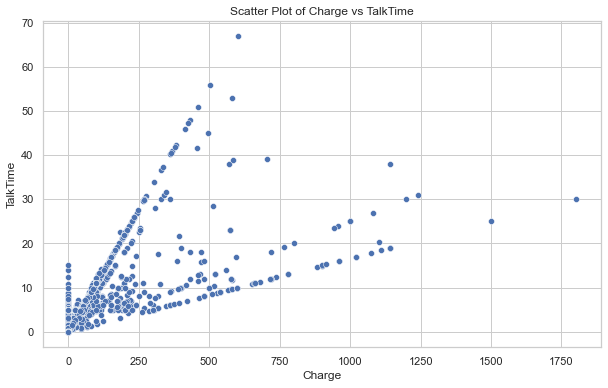

In [16]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df2, x='Charge', y='TalkTime')
plt.title('Scatter Plot of Charge vs TalkTime')
plt.xlabel('Charge')
plt.ylabel('TalkTime')
plt.show()


4. Visualize the distribution of call charges using a histogram.

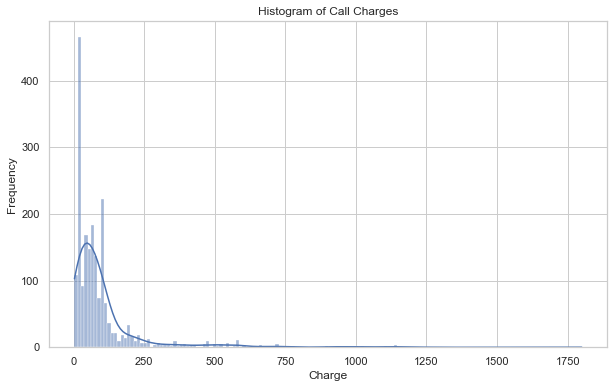

In [17]:
filtered_df3 = df2[df2['Charge'] != 0]

plt.figure(figsize=(10, 6))
sns.histplot(filtered_df3['Charge'], kde=True)
plt.title('Histogram of Call Charges')
plt.xlabel('Charge')
plt.ylabel('Frequency')

plt.show()

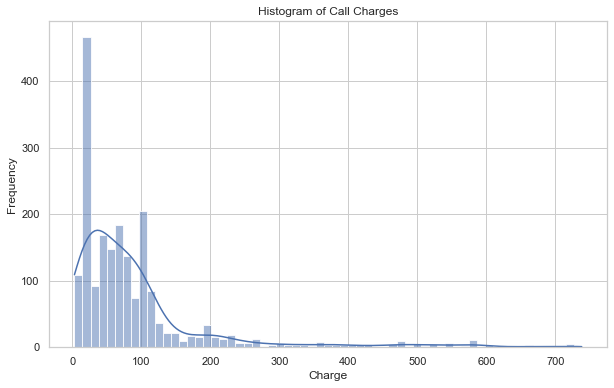

In [18]:
filtered_df2 = df2[(df2['Charge'] != 0) & (df2['Charge'] <= 750)]

plt.figure(figsize=(10, 6))
sns.histplot(filtered_df2['Charge'], kde=True)
plt.title('Histogram of Call Charges')
plt.xlabel('Charge')
plt.ylabel('Frequency')

plt.show()

### Task 2: Call Center Performance Metrics

5. Calculate the average TalkTime for different call activities (Activity column)

In [19]:
new_column_names = {
    'consultationType': 'Activity',
}

df2.rename(columns=new_column_names, inplace=True)

In [20]:
df2.head()

,chatStatus,guruName,gid,Activity,website,chatSeconds,TalkTime,Charge,astrologersEarnings,netAmount,source,userCallStatus,createdAt,updatedAt
0,incomplete,Astro Sanjeev,95,Chat,gurucool,300.0,0.008750,0.0,0.0,0.0,NaN,NaN,2023-12-01T00:04:02.993Z,2023-12-01T00:07:33.833Z
1,incomplete,Astro Sanjeev,95,Chat,gurucool,300.0,0.004067,0.0,0.0,0.0,NaN,NaN,2023-12-01T00:08:51.903Z,2023-12-01T00:09:56.111Z
2,incomplete,Astro Sanjeev,95,Chat,gurucool,300.0,0.004217,0.0,0.0,0.0,NaN,NaN,2023-12-01T00:17:22.270Z,2023-12-01T00:22:04.382Z
3,incomplete,Astro Sanjeev,95,Chat,gurucool,300.0,0.006733,0.0,0.0,0.0,NaN,NaN,2023-12-01T00:24:41.672Z,2023-12-01T00:29:44.022Z
4,failed,Astro Sanjeev,95,Chat,gurucool,300.0,0.000000,0.0,0.0,0.0,NaN,NaN,2023-12-01T00:48:53.744Z,2023-12-01T00:50:33.153Z


In [21]:
Type = df2.Activity.value_counts()
Type

Chat                19514
Call                 8508
public_live_Call        3
Complementary           2
Name: Activity, dtype: int64

In [22]:
df2.drop(df2[df2['Activity'].isin(['public_live_Call', 'Complementary'])].index, inplace=True)

In [23]:
average_talktime = df2.groupby('Activity')['TalkTime'].mean()

print(average_talktime)

Activity
Call    1.945297
Chat    1.319145
Name: TalkTime, dtype: float64


6. Determine the most common source of calls (Source column)

In [24]:
most_common_source = df2['source'].value_counts().idxmax()

print(f"The most common source of calls is: {most_common_source}")

The most common source of calls is: Production


7. Calculate the total earnings and spending for both users and masters.

In [25]:
new_column_names = {
    'netAmount': 'userSpending',
    'astrologersEarnings': 'mastersEarnings'
}

df2.rename(columns=new_column_names, inplace=True)
df2.head(1)

,chatStatus,guruName,gid,Activity,website,chatSeconds,TalkTime,Charge,mastersEarnings,userSpending,source,userCallStatus,createdAt,updatedAt
0,incomplete,Astro Sanjeev,95,Chat,gurucool,300.0,0.00875,0.0,0.0,0.0,NaN,NaN,2023-12-01T00:04:02.993Z,2023-12-01T00:07:33.833Z


In [26]:
total_user_spending = df2['userSpending'].sum()

total_master_earnings = df2['mastersEarnings'].sum()

print(f"Total User Spending: {total_user_spending}")
print(f"Total Masters Earnings: {total_master_earnings}")


Total User Spending: 213936.718333317
Total Masters Earnings: 99138.081333273


8. Analyze the relationship between TalkTime and Charge.

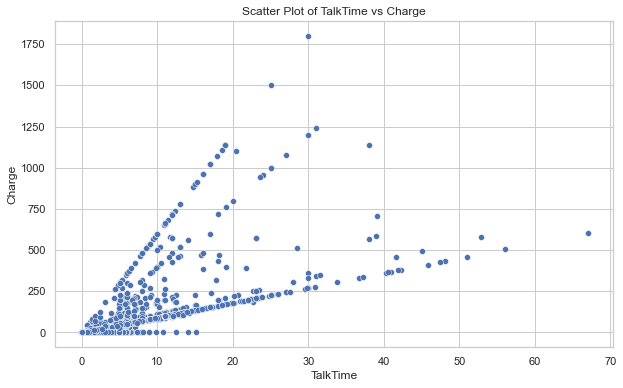

The correlation coefficient between TalkTime and Charge is: 0.60


In [27]:
from scipy.stats import pearsonr
                   
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TalkTime', y='Charge', data=df2)
plt.title('Scatter Plot of TalkTime vs Charge')
plt.xlabel('TalkTime')
plt.ylabel('Charge')
plt.show()

correlation, _ = pearsonr(df2['TalkTime'],df2['Charge'])

print(f"The correlation coefficient between TalkTime and Charge is: {correlation:.2f}")

A correlation coefficient of 0.60 indicates a moderately strong positive linear relationship between TalkTime and Charge. This means that, generally, as TalkTime increases, the Charge tends to increase as well.

### Task 3: Call Handling Analysis

9. Calculate the average time it takes for calls to be connected (ConnectTime - DialTime).

In [28]:
df2.head(2)

,chatStatus,guruName,gid,Activity,website,chatSeconds,TalkTime,Charge,mastersEarnings,userSpending,source,userCallStatus,createdAt,updatedAt
0,incomplete,Astro Sanjeev,95,Chat,gurucool,300.0,0.008750,0.0,0.0,0.0,NaN,NaN,2023-12-01T00:04:02.993Z,2023-12-01T00:07:33.833Z
1,incomplete,Astro Sanjeev,95,Chat,gurucool,300.0,0.004067,0.0,0.0,0.0,NaN,NaN,2023-12-01T00:08:51.903Z,2023-12-01T00:09:56.111Z


In [29]:
df2['createdAt'] = pd.to_datetime(df2['createdAt'])
df2['updatedAt'] = pd.to_datetime(df2['updatedAt'])

df2['ConnectTime'] = df2['updatedAt'] - df2['createdAt']

avg_connect_time = df2['ConnectTime'].mean()

print("Average time for calls to be connected:", avg_connect_time)


Average time for calls to be connected: 0 days 00:56:39.057180822


10. Identify the most common reason for call disconnection (UnconnectTime - ConnectTime).

In [30]:
reasons = df2.userCallStatus.value_counts()
reasons

NaN          18679
completed     7620
canceled       992
busy           439
no-answer      206
failed          86
Name: userCallStatus, dtype: int64

As we can see the most common reason to for call disconnection is canceled call

11. Analyze the HangUpTime patterns and identify any trends.

There is no specific data available that can help me to analyze the hangup time patterns

### Task 4: Order and Refund Analysis

12. Determine the order status distribution for calls.

In [31]:
Type = df2.Activity.value_counts()
Type

Chat    19514
Call     8508
Name: Activity, dtype: int64

<AxesSubplot:>

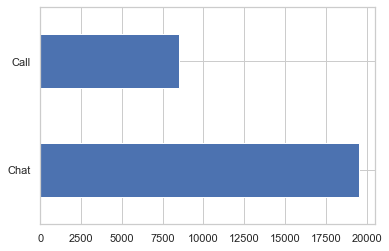

In [32]:
Type.plot(kind='barh')

There are total 8508 order status distribution by calls.

13. Calculate the total refund amount and identify the refund status distribution.

As I checked On Excel sheet by filter tool there are only 5 Refund initiated and amount is encrypted by code so its not possible to identify total refund amount.


### Task 5: Insights and Recommendations

14. Based on your analysis, provide insights into call center performance and any actionable recommendations for improving call handling, user satisfaction, or earnings.

**The Good News:**

* Customers are spending a good amount (₹213,936.72).

**Insights:**

* **Long Calls & Low Earnings:** Calls are long (1.5 hours) but charges are low (₹7.6). This suggests missed upselling opportunities or undercharging for complex calls. Analyze long calls and consider tiered pricing based on duration.
* **High Connection Time:** It takes too long (56 minutes) to connect calls. This might be due to understaffing or inefficient routing. Invest in workforce management tools to optimize call distribution.
* **Many Production Calls:** A high volume of calls come from the production department.  Improve communication or offer self-service options (FAQs, tutorials) to reduce these calls.

**Recommendations:**

* Train agents on upselling and handling complex calls efficiently.
* Track long calls to understand reasons and missed opportunities.
* Improve call center staffing or routing to reduce connection time.
* Track customer satisfaction (surveys) to see if changes are working.).



### Task 6: Data Visualization

15. Create additional visualizations to showcase your data visualization skills

In [33]:
df2.head(2)

,chatStatus,guruName,gid,Activity,website,chatSeconds,TalkTime,Charge,mastersEarnings,userSpending,source,userCallStatus,createdAt,updatedAt,ConnectTime
0,incomplete,Astro Sanjeev,95,Chat,gurucool,300.0,0.008750,0.0,0.0,0.0,NaN,NaN,2023-12-01 00:04:02.993000+00:00,2023-12-01 00:07:33.833000+00:00,0 days 00:03:30.840000
1,incomplete,Astro Sanjeev,95,Chat,gurucool,300.0,0.004067,0.0,0.0,0.0,NaN,NaN,2023-12-01 00:08:51.903000+00:00,2023-12-01 00:09:56.111000+00:00,0 days 00:01:04.208000


In [34]:
Guru = df2.guruName.value_counts()
Guru

Astro Krishaa      1580
Astro  Sakthi      1450
Astro Shalini      1321
Astro  Brejesh     1070
Astro Divya        1056
                   ... 
Astro Rohan  S        2
Tarot  Mystical       2
Tarot  Anshu          2
 Dr.  Pratibha        2
Tarot Rittika         1
Name: guruName, Length: 151, dtype: int64

<AxesSubplot:>

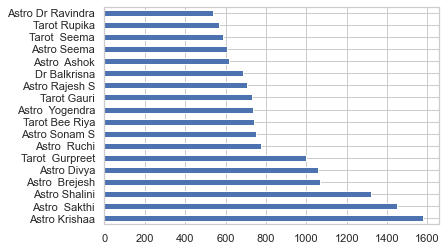

In [35]:
filtered_dataG = Guru[Guru > 500]
filtered_dataG.plot(kind='barh')


Astro Krishna is the top contributor for Astro Guruji with total of 1580 queries.

In [36]:
Status = df2.chatStatus.value_counts()
Status

incomplete    15148
failed         7256
completed      5535
pending          48
started          35
Name: chatStatus, dtype: int64

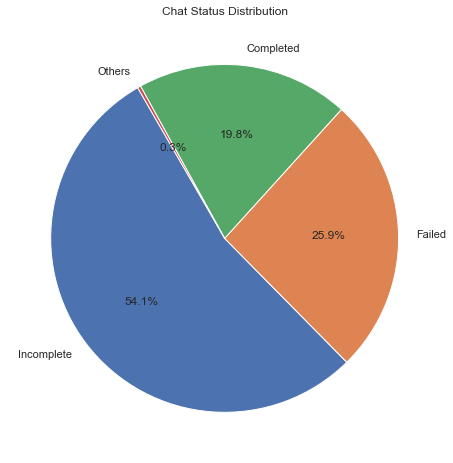

In [37]:
data = {'Incomplete': 15148, 'Failed': 7256, 'Completed': 5535, 'Others': 83} #Others = Pending + Started 
labels = data.keys()
sizes = data.values()

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=120)
plt.title('Chat Status Distribution')
plt.show()

Out of all the chats, more than half (54.1%) are incomplete, while about a quarter (25.9%) have failed. Only a small portion (19.8%) of chats are completed. 

In [38]:
Medium = df2.website.value_counts()
Medium

gurucool    20225
app          7797
Name: website, dtype: int64

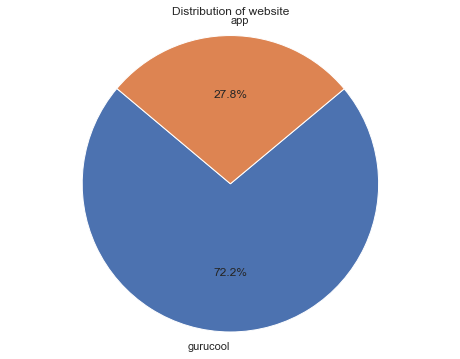

In [39]:
labels = ['gurucool', 'app']
sizes = [20225, 7797]

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of website')
plt.axis('equal')  
plt.show()

As we can see almost 3/4 traffic generate from the website of Astro Guruji and only 1/4 traffic generated by app.

16. Please create a line chart showing the trend in call charges over time.

In [40]:
df2['Date'] = pd.to_datetime(df2['updatedAt']).dt.date

df2.head()


,chatStatus,guruName,gid,Activity,website,chatSeconds,TalkTime,Charge,mastersEarnings,userSpending,source,userCallStatus,createdAt,updatedAt,ConnectTime,Date
0,incomplete,Astro Sanjeev,95,Chat,gurucool,300.0,0.008750,0.0,0.0,0.0,NaN,NaN,2023-12-01 00:04:02.993000+00:00,2023-12-01 00:07:33.833000+00:00,0 days 00:03:30.840000,2023-12-01
1,incomplete,Astro Sanjeev,95,Chat,gurucool,300.0,0.004067,0.0,0.0,0.0,NaN,NaN,2023-12-01 00:08:51.903000+00:00,2023-12-01 00:09:56.111000+00:00,0 days 00:01:04.208000,2023-12-01
2,incomplete,Astro Sanjeev,95,Chat,gurucool,300.0,0.004217,0.0,0.0,0.0,NaN,NaN,2023-12-01 00:17:22.270000+00:00,2023-12-01 00:22:04.382000+00:00,0 days 00:04:42.112000,2023-12-01
3,incomplete,Astro Sanjeev,95,Chat,gurucool,300.0,0.006733,0.0,0.0,0.0,NaN,NaN,2023-12-01 00:24:41.672000+00:00,2023-12-01 00:29:44.022000+00:00,0 days 00:05:02.350000,2023-12-01
4,failed,Astro Sanjeev,95,Chat,gurucool,300.0,0.000000,0.0,0.0,0.0,NaN,NaN,2023-12-01 00:48:53.744000+00:00,2023-12-01 00:50:33.153000+00:00,0 days 00:01:39.409000,2023-12-01


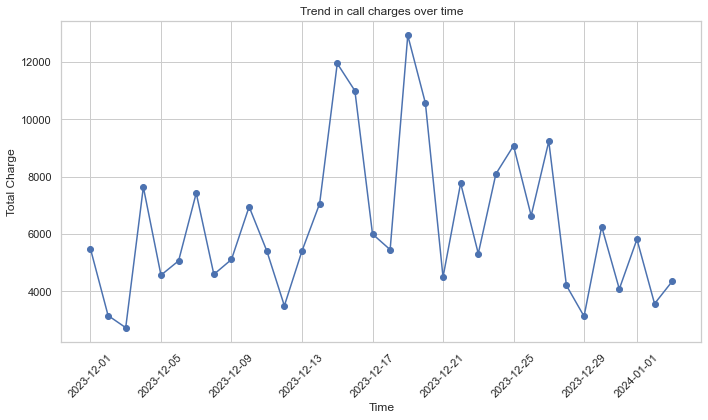

In [41]:
grouped_data = df2.groupby('Date')['Charge'].sum()

plt.figure(figsize=(10, 6))
plt.plot(grouped_data.index, grouped_data.values, marker='o')
plt.xlabel('Time')
plt.ylabel('Total Charge')
plt.title('Trend in call charges over time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

17. Create a scatter plot to analyze the relationship between TalkTime and UserSpend.

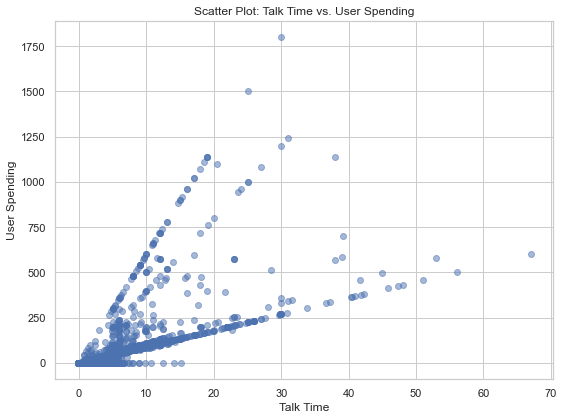

In [42]:
plt.figure(figsize=(8, 6))
plt.scatter(df2['TalkTime'], df2['userSpending'], alpha=0.5)
plt.xlabel('Talk Time')
plt.ylabel('User Spending')
plt.title('Scatter Plot: Talk Time vs. User Spending')
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 7: Interpretation

18. What insights can you draw from the histogram of call charges?

Its a right skewed distribution where more than 90% data lies on left side. This histogram shows that most users have charges that are less than 250 Indian Rupees. This suggests that the majority of users are spending relatively smaller amounts on the service or product being charged for.

19. Based on the line chart, do you see any seasonal patterns in call charges?

Yes, there is a hike in total charges value between 12 December to 21 December of the months that suggest that users spends more in middle of the month. This also can help us in the marketing strategy at what time company should run more ad campaign. As result, we can suggest to our marketing team to target more customers in middle of the month.

20. What does the scatter plot tell us about the relationship between TalkTime and UserSpend?

It suggest positive correlation between TalkTime and UserSpend. This means that, generally, as TalkTime increases the UserSpend increase as well. Also there are some outliers with spending of 1500 and 1750 with less talk time. We can take these examples in positive manner So, We can use similar strategy with other user to increase customer experience and company revenue.